In [1]:
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Set variables below accordingly
root_folder = os.path.join(os.path.curdir, 'results') 
folder = "femnist_kl"
metrics = ['server_cross_entropy', 'selected_client_cross_entropy']
folder = os.path.join(root_folder, folder)

In [73]:
dict_par = {'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_0_0_e20201014-221229': 0, 
            'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_1_0_e20201014-221228': 1e-6, 
            'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_2_0_e20201014-221229': 1e-5, 
            'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_3_0_e20201014-221229': 1e-4, 
            'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_4_0_e20201014-221229': 1e-3,
            'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_5_0_e20201014-221228': 1e-2,
            'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_6_0_e20201014-221229': 1e-1,
            'femnist_virtual_natural_K1_C1_E1_kl_test_g20201014-221200_7_0_e20201014-221229': 1}

In [145]:
metric_curves = {}
for i, m in enumerate(metrics):
    metric_curves[m] = {}
    for root, dirs, files in os.walk(folder):
        for fol in dirs:
            exp_folder = os.path.join(folder, fol)
            curve = np.load(str(os.path.join(exp_folder, m) + ".npy"))  # Load file
            metric_curves[m][fol] = curve 

In [146]:
def plot_curves(axe, curve, title="", ylabel="", xlabel="rounds", label='', color=None):
    c, = axe.plot(curve, label=label, color=color, linewidth=2.)
    axe.set_title(title)
    axe.set_ylabel(ylabel)
    #axe.set_xlabel(xlabel)
    axe.set_yscale('log')
    #handles, labels = axe.get_legend_handles_labels()
    #labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0])))
    #labels = list(map(float, labels))
    #labels = ["{:.0e}".format(l) for l in labels]
    #axe.legend(handles, labels)
    #axe.axes.ticklabel_format(style='sci', scilimits=(0,0))

In [147]:
average_window=20

/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/matplotlib/colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])
/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/matplotlib/colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])
/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/matplotlib/colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])
/home/luca/miniconda2/envs/tff_virtual/lib/python3.7/site-packages/matplotlib/colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


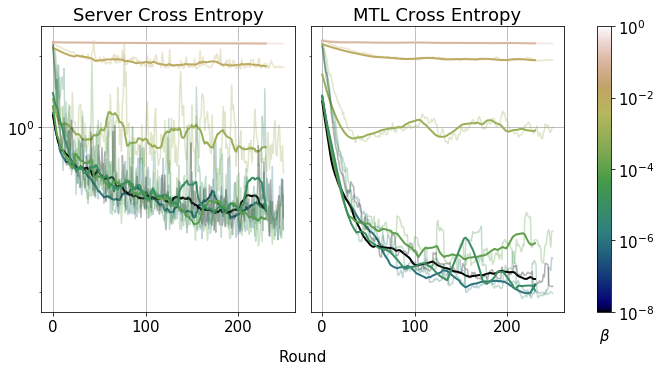

In [151]:
import matplotlib

parameters = list(dict_par.values())

norm = matplotlib.colors.LogNorm(
    vmin=np.min(parameters)+1e-8,
    vmax=np.max(parameters))

c_m = matplotlib.cm.gist_earth
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

f, axes = plt.subplots(1, len(metric_curves.keys()), sharey=True, sharex=True, figsize=(10, 5))
    
matplotlib.rcParams.update({'font.size': 15, 'font.serif': 'DejaVuSans'})

for i, (metric, curve_dict) in enumerate(metric_curves.items()):
    for j, (fol, curve) in enumerate(curve_dict.items()):
        plot_curves(axes[i], np.convolve(curve, np.ones((average_window,))/average_window, mode='valid'),
                    label=float(dict_par[fol]), color=s_m.to_rgba(dict_par[fol]))
        axes[i].plot(curve, alpha=0.3, color=s_m.to_rgba(dict_par[fol]))

axes[0].set_title('Server Cross Entropy')
axes[1].set_title('MTL Cross Entropy')
axes[0].grid()
axes[1].grid()

f.text(0.4, -0.03,'Round', size=15)
plt.tight_layout()

cbar = plt.colorbar(s_m, ax=axes.ravel().tolist(), use_gridspec=True)
#cbar.ax.set_yticklabels(np.arange(7))
cbar.ax.set_ylabel(r'$\beta$', rotation=0, labelpad=-50, y=-0.05, size=15)
cbar.ax.set_aspect(20)
plt.savefig('kl_contribution.pdf', format='pdf', bbox_inches='tight')